<a href="https://colab.research.google.com/github/AyaElshazly/Applied-Machine-Learning/blob/main/Group4_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import classification_report


# **General function for confusion function**

In [ ]:
def conff_matrix(conf_matrix):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.8)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

# **Reading data from the URL**

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
df = pd.read_csv(url, header=None)

# **Display the dataframe**

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# **Adding Headers to the data**

In [ ]:
column_names = ['make', 'address', 'all', '3d',
                    'our', 'over', 'remove', 'internet',
                    'order', 'mail', 'receive', 'will',
                    'people', 'report', 'address', 'free',
                    'business', 'email', 'you', 'credit',
                    'your', 'font', '000', 'money',
                    'hp', 'hpl', 'george', '650',
                    'lab', 'labs', 'telnet', '857',
                    'data', '415', '85', 'technology',
                    '1999', 'parts', 'pm', 'direct',
                    'cs', 'meeting', 'original', 'project',
                    're', 'edu', 'table', 'conference',
                    'char_semicolon', 'char_parenthesis', 'char_bracket', 'char_exclamation', 'char_dollar',
                    'char_hashtag', 'capital_run_length_average', 'capital_run_length_longest',
                    'capital_run_length_total', 'is_spam']


df.columns = column_names
df.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,char_semicolon,char_parenthesis,char_bracket,char_exclamation,char_dollar,char_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# **Splitting the data manually into training and test set**

In [ ]:
# Split the dataset into training and test sets
train_df = df.iloc[:int(len(df) * 0.8)]
test_df = df.iloc[int(len(df) * 0.8):]

# Separate the features and target variables
x_train_a = train_df.drop('is_spam', axis=1)
y_train_a = train_df['is_spam']
x_test_a = test_df.drop('is_spam', axis=1)
y_test_a = test_df['is_spam']

# **Verifying the splitting process**

In [ ]:
df.shape

(4601, 58)

In [ ]:
train_df.shape

(3680, 58)

In [ ]:
test_df.shape

(921, 58)

In [ ]:
print("Dataset shape",df.shape)
print("Training set shape",train_df.shape)
print("Testing set shape",test_df.shape)

Dataset shape (4601, 58)
Training set shape (3680, 58)
Testing set shape (921, 58)


# **A-1) Gaussian classifier**

In [ ]:
g_classifier_a = GaussianNB()

In [ ]:
g_classifier_a.fit(x_train_a, y_train_a)
y_pred_a = g_classifier_a.predict(x_test_a)

### **Print the accuracy and confusion matrix for Gaussian classifier**

accuracy of test data for Gaussian:  0.6178067318132465
Confusion matrix for test set: 
 [[569 352]
 [  0   0]]


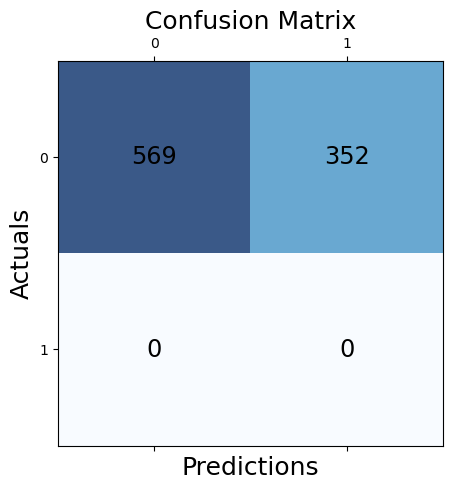

In [ ]:
accuracy_a1 = accuracy_score(y_test_a, y_pred_a)
print('accuracy of test data for Gaussian: ', accuracy_a1)

cm_a1 = confusion_matrix(y_test_a, y_pred_a)
print("Confusion matrix for test set: \n", cm_a1)
conff_matrix(cm_a1)

# **A-2) Multinomial Naive Bayes Classifiers**

In [ ]:
mn_classifier_a = MultinomialNB()

In [ ]:
mn_classifier_a.fit(x_train_a, y_train_a)
y2_pred_a = mn_classifier_a.predict(x_test_a)

### Print the accuracy and confusion matrix for Multinomial Naive Bayes Classifier**

accuracy of test data for Multinomial:  0.7231270358306189
Confusion matrix for test set: 
 [[666 255]
 [  0   0]]


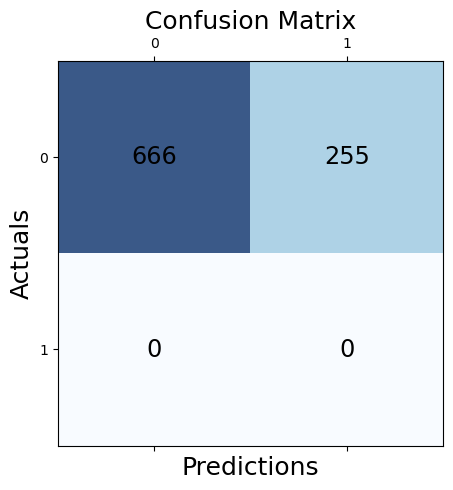

In [ ]:
accuracy_a2 = accuracy_score(y_test_a, y2_pred_a)
print('accuracy of test data for Multinomial: ', accuracy_a2)

cm_a2 = confusion_matrix(y_test_a, y2_pred_a)
print("Confusion matrix for test set: \n", cm_a2)
conff_matrix(cm_a2)

# **B) Splitting the data using train_test_split**

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
y = np.array(y.tolist())
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape",x_train_b.shape)
print("Testing set shape",x_test_b.shape)

Training set shape (3680, 57)
Testing set shape (921, 57)


# **B-1) Gaussian classifier**

In [ ]:
g_classifier_b = GaussianNB()

In [ ]:
g_classifier_b.fit(x_train_b, y_train_b)
y_pred_b = g_classifier_b.predict(x_test_b)

### **Print the accuracy and confusion matrix for Gaussian classifier**

accuracy of test data for Gaussian:  0.8208469055374593
Confusion matrix for test set: 
 [[387 144]
 [ 21 369]]


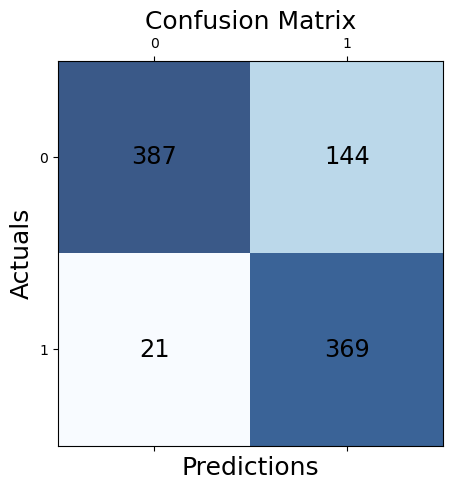

In [ ]:
accuracy_b1 = accuracy_score(y_test_b, y_pred_b)
print('accuracy of test data for Gaussian: ', accuracy_b1)

cm_b1 = confusion_matrix(y_test_b, y_pred_b)
print("Confusion matrix for test set: \n", cm_b1)
conff_matrix(cm_b1)

### **Print the classification report for Gaussian classifier**



In [ ]:
classification_report(y_test_b, y_pred_b)

'              precision    recall  f1-score   support\n\n           0       0.95      0.73      0.82       531\n           1       0.72      0.95      0.82       390\n\n    accuracy                           0.82       921\n   macro avg       0.83      0.84      0.82       921\nweighted avg       0.85      0.82      0.82       921\n'

# **B-2) Multinomial Naive Bayes Classifier**

In [ ]:
mn_classifier_b = MultinomialNB()

In [ ]:
mn_classifier_b.fit(x_train_b, y_train_b)
y2_pred_b = mn_classifier_b.predict(x_test_b)

### **Print the accuracy and confusion matrix for Multinomial Naive Bayes Classifier**

accuracy of test data for Multinomial:  0.7861020629750272
Confusion matrix for test set: 
 [[445  86]
 [111 279]]


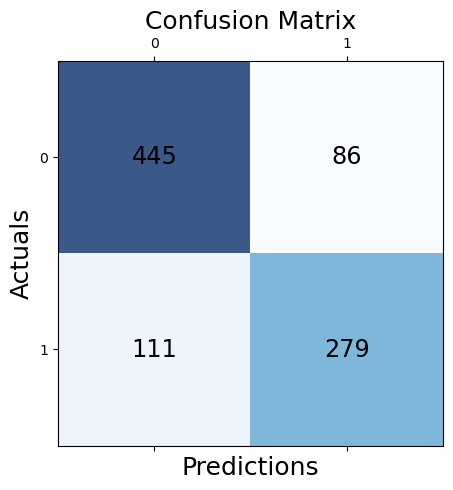

In [ ]:
accuracy_b2 = accuracy_score(y_test_b, y2_pred_b)
print('accuracy of test data for Multinomial: ', accuracy_b2)

cm_b2 = confusion_matrix(y_test_b, y2_pred_b)
print("Confusion matrix for test set: \n", cm_b2)
conff_matrix(cm_b2)

### **Print the classification report for Multinomial Naive Bayes Classifier**

In [ ]:
classification_report(y_test_b, y2_pred_b)

'              precision    recall  f1-score   support\n\n           0       0.80      0.84      0.82       531\n           1       0.76      0.72      0.74       390\n\n    accuracy                           0.79       921\n   macro avg       0.78      0.78      0.78       921\nweighted avg       0.79      0.79      0.79       921\n'

# **C) Train using Bernoulli classifier**

In [ ]:
bn_classifier = BernoulliNB()
bn_classifier.fit(x_train_b, y_train_b)
y_pred_bn = bn_classifier.predict(x_test_b)
acc_bn = accuracy_score(y_test_b, y_pred_bn)

### **Print the accuracy and classification report for Bernoulli classifier**

In [ ]:
print("The accuracy for Bernoulli classifier",acc_bn)
print("Classification Report\n",classification_report(y_test_b, y_pred_bn))

The accuracy for Bernoulli classifier 0.8805646036916395
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       531
           1       0.91      0.80      0.85       390

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.88       921
weighted avg       0.88      0.88      0.88       921



### **Print confusion matrix for Bernoulli classifier**

Confusion matrix for test set: 
 [[499  32]
 [ 78 312]]


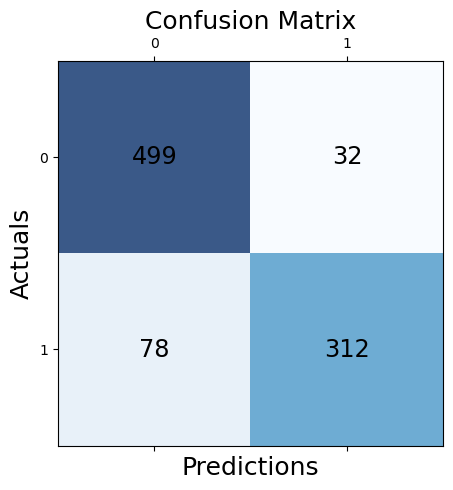

In [ ]:
cm_c1 = confusion_matrix(y_test_b, y_pred_bn)
print("Confusion matrix for test set: \n", cm_c1)
conff_matrix(cm_c1)

### The reason why the Bernoulli Naive Bayes classifier performs better in this case is because it is designed to work with binary data. In this dataset, the features are counts of words and characters, which can be considered binary data by thresholding them at zero. The Bernoulli Naive Bayes classifier models the probability of each feature being present or absent in each class, which is a better fit for this type of data than the Gaussian or Multinomial Naive Bayes classifiers.

### The classification report for the Bernoulli Naive Bayes classifier shows that it achieves high precision and recall for both the spam and non-spam classes, with an F1-score of 0.85. The confusion matrix shows that the classifier correctly classified 499 non-spam emails and 312 spam emails, with only 32 false positives and 78 false negatives.

### **Take the first 80 percent training samples of A, and split the data into four equal parts**

In [ ]:
# Divide the training set into four equal subsets
subset_size = len(x_train_a) // 4
subset_1_X = x_train_a.iloc[:subset_size]
subset_1_y = y_train_a.iloc[:subset_size]
subset_2_X = x_train_a.iloc[subset_size:subset_size*2]
subset_2_y = y_train_a.iloc[subset_size:subset_size*2]
subset_3_X = x_train_a.iloc[subset_size*2:subset_size*3]
subset_3_y = y_train_a.iloc[subset_size*2:subset_size*3]
subset_4_X = x_train_a.iloc[subset_size*3:]
subset_4_y = y_train_a.iloc[subset_size*3:]

In [ ]:
print("Training set of subset-1",subset_1_X.shape)
print("Training set of subset-2",subset_2_X.shape)
print("Training set of subset-3",subset_3_X.shape)
print("Training set of subset-4",subset_4_X.shape)
print("Test set of subset-1",subset_1_y.shape)
print("Test set of subset-2",subset_2_y.shape)
print("Test set of subset-3",subset_3_y.shape)
print("Test set of subset-4",subset_4_y.shape)

Training set of subset-1 (920, 57)
Training set of subset-2 (920, 57)
Training set of subset-3 (920, 57)
Training set of subset-4 (920, 57)
Test set of subset-1 (920,)
Test set of subset-2 (920,)
Test set of subset-3 (920,)
Test set of subset-4 (920,)


# **Train the 4 subsets using Bernoulli classifier**

In [ ]:
# Train Bernoulli Naive Bayes Classifier on each subset and evaluate on the test set
accuracies = []
bn_classifier = BernoulliNB()
for x_subset, y_subset in [(subset_1_X, subset_1_y), (subset_2_X, subset_2_y),
                           (subset_3_X, subset_3_y), (subset_4_X, subset_4_y)]:
    bn_classifier.fit(x_subset, y_subset)
    y_pred = bn_classifier.predict(x_test_a)
    accuracy = accuracy_score(y_test_a, y_pred)
    accuracies.append(accuracy)

### **Accuracies for the 4 subsets**

In [ ]:
print("Accuracies for the 4 subsets",accuracies)

Accuracies for the 4 subsets [0.0, 0.6438653637350705, 1.0, 1.0]


# **plotting the accuracies using a bar chart**

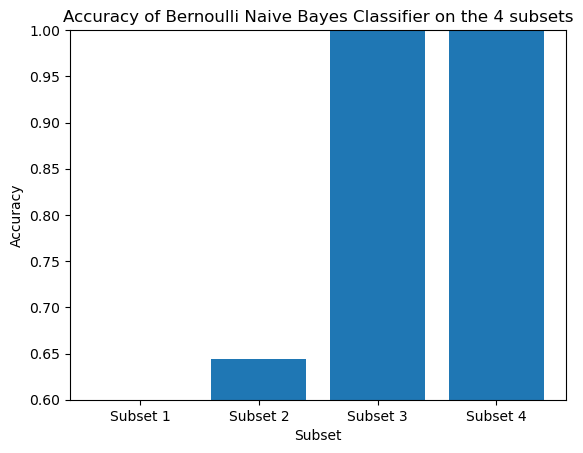

In [ ]:
# Plot the accuracies for each subset as a bar chart
plt.bar(['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4'], accuracies)
plt.title('Accuracy of Bernoulli Naive Bayes Classifier on the 4 subsets')
plt.xlabel('Subset')
plt.ylabel('Accuracy')
plt.ylim(0.60, 1)
plt.show()

In [ ]:
subset_2_y

920     1
921     1
922     1
923     1
924     1
       ..
1835    0
1836    0
1837    0
1838    0
1839    0
Name: is_spam, Length: 920, dtype: int64

In [ ]:
x_test_a

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,char_semicolon,char_parenthesis,char_bracket,char_exclamation,char_dollar,char_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3680,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,3
3681,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,3
3682,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,4
3683,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,3
3684,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78


### **Count values in subset1 and subset2**

In [ ]:
subset_1_y.value_counts()

1    920
Name: is_spam, dtype: int64

In [ ]:
subset_2_y.value_counts()

1    893
0     27
Name: is_spam, dtype: int64

#### The accuracies of the four subsets are as follows: subset1 = 0.0, subset2 = 0.6438653637350705, subset3 = 1.0, and subset4 = 1.0.

###### It is obvious that subsets 1 and 2 have the lowest accuracies due to data imbalance. Specifically, in subset1, all the data points have a value of 1. When the model attempts to compare these values with test data, which is also unbalanced and predominantly consists of zeros, this results in poor accuracy. Similarly, in subset2, nearly 893 data points have a value of 1 ("spam"), while only 27 have a value of 0 ("not spam"). As a result, when the model compares subset2 with test data, it yields an accuracy of 0.6438653637350705. In contrast, subsets 3 and 4 have accuracies of 100% as all their values are 1.